# numpy cheat sheet - Linear algebra & Discrete Fourier Transform

## 总体参数说明
- a/array_like: 可以使用__array__函数返回成数组任何对象，包括```list, tuple, list[list...], tuple[tuple...], list[tuple...], tuple[list...]```
- v: 向量参数
- shape: numpy数组的各维度长度的tuple
- out: 代入的numpy数组作为输出
- dtype: numpy数组类型
- order: C顺序或Fortran顺序
- subok: True返回ndarray的子类，False返回ndarray
- axis: 操作的维度，第一个维度为0，以此类推
- axes：操作维度的集合

In [1]:
# 引入numpy和matplotlib内联
import numpy as np
%matplotlib inline

## 线性代数

In [2]:
# 引入线性代数库
import numpy.linalg as la

### 矩阵和向量乘积

In [3]:
# dot(arr1, arr2 [, out])
# 计算两个数组的矢量乘积，点积
# 如果两个数组是1维向量，计算两个向量的内积
# 如果两个数组是2维矩阵，计算矩阵点积，但更推荐使用matmul或者@运算
# 如果其中一个数组是标量，计算按元素的标量乘积，但更推荐使用multiply或者*运算
# 如果arr1是一个n维张量，arr2是一个1维向量，计算arr1最后一个维度和b的内积和
# 如果arr1是一个n维张量，arr2是一个m维张量，计算arr1最后一个维度和arr2倒数第二个维度的内积和
arr1 = np.arange(5)
arr2 = np.array([1,3,5,7,9])
print(np.dot(arr1, arr2)) # 两个向量的内积
arr1 = np.arange(6).reshape(2, 3)
arr2 = np.array([[1,3],[5,7],[9,11]])
print(np.dot(arr1, arr2)) # 两个矩阵的点积
print(np.matmul(arr1, arr2))
print(arr1@arr2)
print(np.dot(arr1, 2)) # 矢量和标量的乘积
print(np.multiply(arr1, 2))
print(arr1*2)
arr2 = np.array([-1, 0, 1])
print(np.dot(arr1, arr2)) # 张量和向量的点积
arr2 = np.arange(12).reshape(2, 3, 2)
print(np.dot(arr1, arr2)) # 张量和张量的点积

70
[[23 29]
 [68 92]]
[[23 29]
 [68 92]]
[[23 29]
 [68 92]]
[[ 0  2  4]
 [ 6  8 10]]
[[ 0  2  4]
 [ 6  8 10]]
[[ 0  2  4]
 [ 6  8 10]]
[2 2]
[[[ 10  13]
  [ 28  31]]

 [[ 28  40]
  [100 112]]]


In [4]:
# linalg.multi_dot(arrs)
# 链式计算多个数组的点积，该函数会自动选择最快的运算顺序
arr1 = np.arange(16).reshape(4, 4)
arr2 = np.arange(12).reshape(4, 3)
arr3 = np.arange(6).reshape(3, 2)
arr4 = np.arange(4).reshape(2, 2)
arr5 = np.array([1, 2])
print(la.multi_dot((arr1, arr2, arr3, arr4, arr5)))
print(arr1@arr2@arr3@arr4@arr5)

[ 4272 12304 20336 28368]
[ 4272 12304 20336 28368]


In [5]:
# 比较dot和@运算的性能，为什么推荐用@运算
% timeit la.multi_dot((arr1, arr2, arr3, arr4, arr5))

46.7 µs ± 2.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
% timeit arr1@arr2@arr3@arr4@arr5

5.92 µs ± 45.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
# vdot(arr1, arr2)
# inner(arr1, arr2)
# 计算两个向量的内积（点积），基本与dot行为一致，vdot是复共轭的，并且会将多维数组扁平化后计算内积
arr1 = np.array([1+2j,3+4j])
arr2 = np.array([5+6j,7+8j])
print(np.dot(arr1, arr2)) # 非复共轭
print(np.vdot(arr1, arr2)) # 复共轭，arr1转换为复共轭量后进行内积计算，等同于
print(np.dot([1-2j,3-4j], [5+6j,7+8j]))
print(np.inner(arr1, arr2)) # 非复共轭

(-18+68j)
(70-8j)
(70-8j)
(-18+68j)


In [8]:
# outer(arr1, arr2 [, out])
# 计算两个向量的外积
arr1 = np.arange(3)
arr2 = np.arange(5)
print(np.outer(arr1, arr2))

[[0 0 0 0 0]
 [0 1 2 3 4]
 [0 2 4 6 8]]


In [9]:
# matmul(arr1, arr2 [, out])
# 计算两个矩阵的点积
# 如果任何一个数组维度大于2，该数组被当做是由最后两个维度的矩阵堆叠而成的张量参与运算
# 如果任何一个数组只有一维，会自动扩展一个维度参与点积运算，运算完成后扩展的维度被清除
arr1 = np.arange(6).reshape(2, 3)
arr2 = np.arange(6).reshape(3, 2)
print(np.matmul(arr1, arr2))
arr2 = np.arange(12).reshape(2, 3, 2)
print(np.matmul(arr1, arr2))
arr2 = np.arange(3)
print(np.matmul(arr1, arr2))

[[10 13]
 [28 40]]
[[[ 10  13]
  [ 28  40]]

 [[ 28  31]
  [100 112]]]
[ 5 14]


In [10]:
# tensordot(arr1, arr2 [, axes])
# axes - 整数或两个array_like元素的tuple，代表需要求点积和的维度，默认值2
# 求张量的点积
arr1 = np.arange(12).reshape(2, 3, 2)
arr2 = np.arange(12).reshape(3, 2, 2)
print(np.tensordot(arr1, arr2))
print(np.tensordot(arr1, arr2, ([1, 2], [0, 1]))) # 等价

[[110 125]
 [290 341]]
[[110 125]
 [290 341]]


In [11]:
# einsum(subscripts, *operands [, out, dtype, order, casting, optimize])
# subscripts - 一个由ijk等下标组成，使用逗号分隔的字符串
# oprands - 参与运算的数组列表
# optimize - 优化参数，False（默认值）: 不优化；True: 'greedy''optimal'
# 计算爱因斯坦约定求和
arr1 = np.arange(6).reshape(2, 3)
print(np.einsum('ji', arr1))
print(arr1.T) # 等价
print(np.einsum('ij->i', arr1))
print(np.einsum('ij->j', arr1))
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
print(np.einsum('ij, ij', arr1, arr2))
print(np.einsum('i..., i...', arr1, arr2))

[[0 3]
 [1 4]
 [2 5]]
[[0 3]
 [1 4]
 [2 5]]
[ 3 12]
[3 5 7]
70
[12 22 36]


In [12]:
# einsum_path(subscripts, *operands [, optimize])
# 返回计算爱因斯坦约定求和的路径
arr1 = np.random.rand(3, 3)
arr2 = np.random.rand(3, 7)
arr3 = np.random.rand(7, 3)
path = np.einsum_path('ij,jk,kl->il', arr1, arr2, arr3, optimize='optimal')
print(path[0])
print(path[1])

['einsum_path', (1, 2), (0, 1)]
  Complete contraction:  ij,jk,kl->il
         Naive scaling:  4
     Optimized scaling:  3
      Naive FLOP count:  7.560e+02
  Optimized FLOP count:  1.810e+02
   Theoretical speedup:  4.177
  Largest intermediate:  9.000e+00 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   3                   kl,jk->jl                                ij,jl->il
   3                   jl,ij->il                                   il->il


In [13]:
# linalg.matrix_power(arr, n)
# 求arr方阵的n次幂，如果n是0，返回对应的单位方阵，如果n小于0，先将arr求逆，然后计算abs(n)次幂
arr = np.array([[0, 1, 0], [-1, 0, -1], [1, 1, 0]])
print(la.matrix_power(arr, 3))
print(la.matrix_power(arr, 0))
print(la.matrix_power(arr, -3))
print(arr**3)

[[-1 -2  0]
 [ 2 -1  2]
 [-2 -2 -1]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[-5.  2.  4.]
 [ 2. -1. -2.]
 [ 6. -2. -5.]]
[[ 0  1  0]
 [-1  0 -1]
 [ 1  1  0]]


In [14]:
# kron(arr1, arr2)
# 求两个数组的克罗内克积
arr1 = np.arange(6).reshape(2, 3)
arr2 = np.random.randint(0, 10, (4, 2))
print(np.kron(arr1, arr2))

[[ 0  0  5  0 10  0]
 [ 0  0  0  7  0 14]
 [ 0  0  8  2 16  4]
 [ 0  0  4  1  8  2]
 [15  0 20  0 25  0]
 [ 0 21  0 28  0 35]
 [24  6 32  8 40 10]
 [12  3 16  4 20  5]]


### 矩阵分解

In [15]:
# linalg.cholesky(arr)
# 返回正定的Hermite矩阵的cholesky分解矩阵
# Hermite埃尔米特矩阵：埃尔米特矩阵中每一个第i行第j列的元素都与第j行第i列的元素的复共轭。
# 正定矩阵：对于一个Hermite矩阵，如果任意非零向量x，都有x.T@A@x>0，则A为正定矩阵
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
print(arr)
l = la.cholesky(arr)
print(l)
print(l@l.T)

[[  4  12 -16]
 [ 12  37 -43]
 [-16 -43  98]]
[[ 2.  0.  0.]
 [ 6.  1.  0.]
 [-8.  5.  3.]]
[[  4.  12. -16.]
 [ 12.  37. -43.]
 [-16. -43.  98.]]


In [16]:
# linalg.svd(arr [, full_matrix, compute_uv])
# full_matrix - True（默认值）: 返回的UV分别是M*M和N*N的矩阵；False: 返回的UV分别是缩减后的M*K和K*N的矩阵，K为M，N的最小值
# compute_uv - True(默认值): 在计算奇异值向量的同时计算UV的矩阵
# 求矩阵的奇异值分解，返回U为一个酉矩阵，s为奇异值向量，V为一个酉矩阵
arr = np.random.randn(3, 5)
u, s, v = la.svd(arr)
print(u)
print(s)
print(v)
S = np.zeros_like(arr)
S[:,:3] = np.diag(s)
print(np.allclose(arr, u@S@v))

[[-0.23107016 -0.91613106  0.32758276]
 [ 0.97146091 -0.23578894  0.0258318 ]
 [ 0.05357508  0.32420281  0.9444693 ]]
[ 2.95870693  1.52487719  1.0139856 ]
[[-0.26203876 -0.04991447 -0.54521733 -0.78564487  0.11976827]
 [ 0.6857056  -0.00209376 -0.6747248   0.2546756   0.09843895]
 [-0.07571602  0.24498713  0.09570322  0.08926537  0.95766433]
 [-0.38815126 -0.7978904  -0.23055317  0.36491685  0.16245134]
 [ 0.55204095 -0.54850376  0.43031458 -0.42044008  0.18014971]]
True


In [17]:
# linalg.qr(arr [, mode])
# mode - 'reduced'（默认值）: 返回的QR维度缩减为M，N中的最小值；'complete': 返回方阵Q和M*N的矩阵R；'r': 仅返回R；
#        'raw': 额外返回豪斯霍尔德算子矩阵h和向量tau
# 求矩阵的QR分解, 返回Q为一个正交矩阵，R为一个上三角阵
arr = np.random.randn(3, 5)
q, r = la.qr(arr)
print(q)
print(r)
print(np.allclose(arr, q@r))

[[-0.5877266  -0.67360157  0.44814994]
 [-0.33902964 -0.29788843 -0.89236842]
 [ 0.73459945 -0.67640476 -0.05329395]]
[[ 2.0606624   0.54975654  0.85867349  0.03694983 -0.14081922]
 [ 0.          0.46409328 -0.01379254 -0.09610143 -1.62202023]
 [ 0.          0.          1.09504671 -0.87775695 -0.20908407]]
True


### 特征值分解

In [18]:
# linalg.eig(arr)
# linalg.eigh(arr)
# 返回矩阵的特征值和特征向量，eigh求Hermite正定矩阵或实对称矩阵的特征值和特征向量，通常速度更快
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
w, v = la.eig(arr)
print(w, v)
print(v@np.diag(w)@la.inv(v))
w, v = la.eigh(arr)
print(w, v)
print(v@np.diag(w)@la.inv(v))

[  1.23477232e+02   1.88049805e-02   1.55039632e+01] [[ 0.16300693  0.96341881  0.21272739]
 [ 0.45732393 -0.26483016  0.84895218]
 [-0.87423313  0.04109976  0.48376363]]
[[  4.  12. -16.]
 [ 12.  37. -43.]
 [-16. -43.  98.]]
[  1.88049805e-02   1.55039632e+01   1.23477232e+02] [[ 0.96341881  0.21272739 -0.16300693]
 [-0.26483016  0.84895218 -0.45732393]
 [ 0.04109976  0.48376363  0.87423313]]
[[  4.  12. -16.]
 [ 12.  37. -43.]
 [-16. -43.  98.]]


In [19]:
# 下面是eig和eigh的性能比较
%timeit la.eig(arr)

34.2 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [20]:
%timeit la.eigh(arr)

17 µs ± 142 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
# linalg.eigvals(arr)
# linalg.eigvalsh(arr)
# 与eig和eigh对应，唯一区别就是不会计算特征向量，仅计算返回特征值
print(la.eigvals(arr))
print(la.eigvalsh(arr))

[  1.23477232e+02   1.88049805e-02   1.55039632e+01]
[  1.88049805e-02   1.55039632e+01   1.23477232e+02]


In [22]:
# 性能比较
%timeit la.eigvals(arr)

28.5 µs ± 511 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [23]:
%timeit la.eigvalsh(arr)

12 µs ± 175 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 方程求解和矩阵逆

In [24]:
# linalg.solve(a, b)
# linalg.tensorsolve(a, b)
# 求线性方程组ax=b的解
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
print(la.solve(arr, [1, 2, 3]))
print(arr@la.solve(arr, [1, 2, 3]))
arr = np.eye(3*2*3).reshape(3,6,3,6)
print(la.tensorsolve(arr, np.arange(18, 0, -1).reshape(3, 6)))

[ 28.58333333  -7.66666667   1.33333333]
[ 1.  2.  3.]
[[ 18.  17.  16.  15.  14.  13.]
 [ 12.  11.  10.   9.   8.   7.]
 [  6.   5.   4.   3.   2.   1.]]


[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]]
3.4 -4.5
[-1.1  2.3  5.7  9.1]


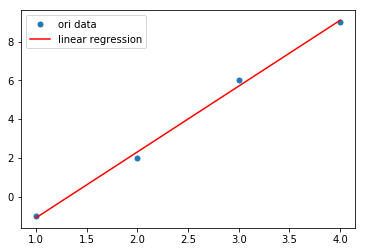

In [25]:
# linalg.lstsq(a, b, rcond)
# 返回线性方程中平方距离最小的那个解x和c，即所有 (ax+c-b)**2 最小的那个解，即最简单的线性回归
a = np.array([1, 2, 3, 4])
b = np.array([-1, 2, 6, 9])
A = np.vstack([a, np.ones(len(a))]).T
print(A)
x, c = la.lstsq(A, b)[0]
print(x, c)
print(a*x+c)
import matplotlib.pyplot as plt
plt.plot(a, b, 'o', label='ori data', markersize=5)
plt.plot(a, a*x+c, 'r', label='linear regression')
plt.legend()
plt.show()

In [26]:
# linalg.inv(arr)
# 求矩阵的逆
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
print(la.inv(arr))
print(np.allclose(la.inv(arr)@arr, np.eye(len(arr))))

[[ 49.36111111 -13.55555556   2.11111111]
 [-13.55555556   3.77777778  -0.55555556]
 [  2.11111111  -0.55555556   0.11111111]]
True


In [27]:
# linalg.pinv(arr)
# 求矩阵的Moore Penrose伪逆
arr = np.arange(12).reshape(4, 3)
print(la.pinv(arr))
print(np.allclose(arr@la.pinv(arr)@arr, arr))

[[-0.43333333 -0.22777778 -0.02222222  0.18333333]
 [-0.03333333 -0.01111111  0.01111111  0.03333333]
 [ 0.36666667  0.20555556  0.04444444 -0.11666667]]
True


In [28]:
# linalg.tensorinv(arr [, ind])
# ind - 进行张量求逆的维度序号，默认值2
# 求张量的逆
arr = np.eye(24).reshape(8, 3, 4, 6)
print(la.tensorinv(arr).shape)
print(la.tensorinv(arr.reshape(24, 4, 6), ind=1).shape)

(4, 6, 8, 3)
(4, 6, 24)


### 范数和其他值函数

In [29]:
# linalg.norm(arr [, ord, axis, keepdims])
# ord - 范数类型：none（默认值）'fro': L2范数，Frobenius范数；'nuc': nuclear范数，奇异值的和；'inf': 最大值范数
#                 '-inf': 最小值范数；0: 非零元素个数
# 求矩阵的范数
arr = np.arange(12).reshape(3, 4)
print(la.norm(arr))
print(la.norm(arr, 'nuc'))
print(la.norm(arr, axis=0))
print(la.norm(arr, 0, axis=0))

22.4944437584
24.3646384993
[  8.94427191  10.34408043  11.83215957  13.37908816]
[ 2.  3.  3.  3.]


In [30]:
# linalg.cond(arr [, ord])
# 求矩阵的条件数值condition number
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
print(la.cond(arr, 'fro'))
print(la.norm(arr)*la.norm(la.inv(arr)))
print(la.cond(arr, 2))
print(la.cond(arr, np.inf))
print(la.cond(arr, 1))

6617.76113062
6617.76113062
6566.1983562
10209.3611111
10209.3611111


In [31]:
# linalg.det(arr)
# 返回矩阵的行列式
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
print(la.det(arr))
arr = np.arange(12).reshape(3, 2, 2)
print(arr)
print(la.det(arr))

36.0
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[-2. -2. -2.]


In [32]:
# linalg.matrix_rank(arr [, tol, hermitian])
# tol - 奇异值向量中被认为为零的阈值，默认值none
# 求矩阵的秩，通过SVD奇异值分解的方式
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
print(la.matrix_rank(arr))
arr = np.array([[-1, 0, -1], [1, 1, 1], [1, 0, 1]])
print(la.matrix_rank(arr))

3
2


In [33]:
# linalg.slogdet(arr)
# 计算arr的行列式的自然对数值，带符号返回
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
print(la.slogdet(arr))
print(np.log(la.det(arr)))

(1.0, 3.5835189384561081)
3.58351893846


In [34]:
# trace(arr [, offset, axis1, axis2, dtype, out])
# 矩阵的迹运算
arr = np.array([[4, 12, -16], [12, 37, -43], [-16, -43, 98]])
print(np.trace(arr))
print(np.trace(arr, offset=-1))

139
-31


## 离散傅里叶变换
### 标准FFT

In [35]:
# 引入fft库
import numpy.fft as fft

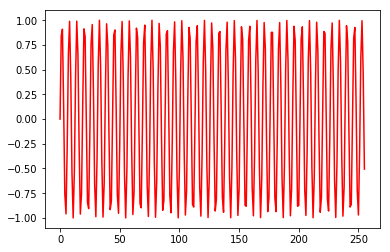

In [36]:
# fft(arr [, n, axis, norm])
# n - dft后该axis的长度，默认值none，代表使用原数组axis维度上的长度
# axis - 进行dft的维度，默认值-1，代表最后一个维度
# norm - 归一化系数，none（默认值）: 变换时使用1，逆变换时使用1/n；'ortho': 变换和逆变换时都使用1/sqrt(n)
# 对arr数组进行离散傅里叶变换
t = np.arange(256)
y = np.sin(t)
plt.plot(t, y, '-r')
plt.show()

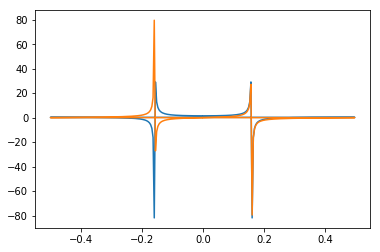

In [37]:
sp = fft.fft(y)
freq = fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

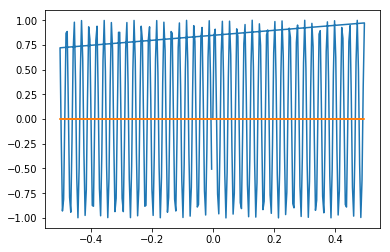

In [38]:
# ifft(arr [, n, axis, norm])
# 对arr数组进行逆离散傅里叶变换
isp = fft.ifft(sp)
plt.plot(freq, isp.real, freq, isp.imag)
plt.show()

In [39]:
# fft2(arr [, s, axes, norm])
# ifft2(arr [, s, axes, norm])
# s - 变换后的各维度长度
# axes - 进行变换的维度数组，默认值为(-2, -1)，即最后两个维度
# 二维离散傅里叶（逆）变换
arr = np.array([[1, 2], [3, 4]])
print(fft.fft2(arr))
print(fft.ifft2(arr))

[[ 10.+0.j  -2.+0.j]
 [ -4.+0.j   0.+0.j]]
[[ 2.5+0.j -0.5+0.j]
 [-1.0+0.j  0.0+0.j]]


In [40]:
# fftn(arr [, s, axes, norm])
# ifftn(arr [, s, axes, norm])
# axes - 进行变换的维度数组，默认值为none，表示最后的s指定的维度，或全部维度（如果s未指定）
# n维离散傅里叶变换
arr = np.arange(12).reshape(2, 3, 2)
print(fft.fftn(arr))
print(fft.ifftn(arr))

[[[ 66.+0.j          -6.+0.j        ]
  [-12.+6.92820323j   0.+0.j        ]
  [-12.-6.92820323j   0.+0.j        ]]

 [[-36.+0.j           0.+0.j        ]
  [  0.+0.j           0.+0.j        ]
  [  0.+0.j           0.+0.j        ]]]
[[[ 5.5+0.j         -0.5+0.j        ]
  [-1.0-0.57735027j  0.0+0.j        ]
  [-1.0+0.57735027j  0.0+0.j        ]]

 [[-3.0+0.j          0.0+0.j        ]
  [ 0.0+0.j          0.0+0.j        ]
  [ 0.0+0.j          0.0+0.j        ]]]


### 实数FFT

In [41]:
# rfft(arr [, n, axis, norm])
# 一维离散傅里叶变换，对于实数值输入，该方法采用了快速傅里叶变换获取结果
arr = np.array([[1, 2], [3, 4]])
print(fft.rfft(arr))

[[ 3.+0.j -1.+0.j]
 [ 7.+0.j -1.+0.j]]


In [42]:
# 对比fft和rfft的性能
%timeit fft.fft(arr)

20.1 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [43]:
%timeit fft.rfft(arr)

14 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [44]:
# irfft(arr [, n, axis, norm])
# 一维离散傅里叶逆变换，对于实数值输入，该方法采用了快速傅里叶变换获取结果
print(fft.irfft(fft.fft(arr)))

[[ 1.  2.]
 [ 3.  4.]]


In [45]:
# rfft2(arr [, s, axes, norm])
# irfft2(arr [, s, axes, norm])
# 二维离散傅里叶变换，对于实数值输入，该方法采用了快速傅里叶变换获取结果
print(fft.rfft2(arr))
print(fft.irfft2(arr))

[[ 10.+0.j  -2.+0.j]
 [ -4.+0.j   0.+0.j]]
[[ 2.5 -0.5]
 [-1.   0. ]]


In [46]:
# rfftn(arr [, n, axes, norm])
# irfftn(arr [, n, axes, norm])
# n维离散傅里叶变换，对于实数值输入，该方法采用了快速傅里叶变换获取结果
arr = np.arange(12).reshape(2, 3, 2)
print(fft.rfftn(arr))
print(fft.irfftn(arr))

[[[ 66.+0.j          -6.+0.j        ]
  [-12.+6.92820323j   0.+0.j        ]
  [-12.-6.92820323j   0.+0.j        ]]

 [[-36.+0.j           0.+0.j        ]
  [  0.+0.j           0.+0.j        ]
  [  0.+0.j           0.+0.j        ]]]
[[[ 5.5 -0.5]
  [-1.   0. ]
  [-1.   0. ]]

 [[-3.   0. ]
  [ 0.   0. ]
  [ 0.   0. ]]]


### 埃尔米特FFT

In [47]:
# hfft(arr [, n, axis, norm])
# ihfft(arr [, n, axis, norm])
# 埃尔米特离散傅里叶变换
arr = np.array([[1, 2], [3, 4]])
print(fft.hfft(arr))
print(fft.ihfft(arr))

[[ 3. -1.]
 [ 7. -1.]]
[[ 1.5+0.j -0.5-0.j]
 [ 3.5+0.j -0.5-0.j]]


### FFT工具函数

In [48]:
# fftfreq(n [, d])
# n - 采样窗口长度
# d - 采样步长，即采样率的倒数，默认值1
# 获得离散傅里叶变换的采样频率
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])
freq = fft.fftfreq(len(arr), d=0.1)
print(freq)
freq = fft.fftfreq(len(arr), d=10)
print(freq)

[ 0.    1.25  2.5   3.75 -5.   -3.75 -2.5  -1.25]
[ 0.      0.0125  0.025   0.0375 -0.05   -0.0375 -0.025  -0.0125]


In [49]:
# rfftfreq(n [, d])
# 获得实数FFT的采样频率
freq = fft.rfftfreq(len(arr), d=0.1)
print(freq)
freq = fft.rfftfreq(len(arr), d=10)
print(freq)

[ 0.    1.25  2.5   3.75  5.  ]
[ 0.      0.0125  0.025   0.0375  0.05  ]


In [50]:
# fftshift(freqs [, axes])
# ifftshift(freqs [, axes])
# freqs - 使用fftfreq获得的采样频率
# axes - 需要进行移动的频率维度
# 将采样频率重新排序，fftshift顺序是负数、0、正数，ifftshift顺序是原始顺序
freq = fft.fftfreq(len(arr), d=0.1)
print(freq)
print(fft.fftshift(freq))
print(fft.ifftshift(fft.fftshift(freq)))

[ 0.    1.25  2.5   3.75 -5.   -3.75 -2.5  -1.25]
[-5.   -3.75 -2.5  -1.25  0.    1.25  2.5   3.75]
[ 0.    1.25  2.5   3.75 -5.   -3.75 -2.5  -1.25]
